**Definition**: As the number of experiments repetitions increases, the average of the sample means better approximate the population mean:
$ \lim_{n \to \infty}P(|\hat{x}_n - \mu| > \epsilon) = 0$. This means that one sample or one experiment does not provide a good estimate of the true population mean, however, the more sample swe get, the more accurate our estimation of the population mean.

## Generate a Population of Random Numbers

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Simulation parameters
population_size = 2.3e5

In [3]:
# 1/f distribution
f = np.linspace(0.001,5,18)
1/f

array([1.00000000e+03, 3.38915470e+00, 1.69745382e+00, 1.13227654e+00,
       8.49447859e-01, 6.79673757e-01, 5.66458965e-01, 4.85575550e-01,
       4.24904397e-01, 3.77710629e-01, 3.39952407e-01, 3.09057194e-01,
       2.83309724e-01, 2.61522368e-01, 2.42846735e-01, 2.26660622e-01,
       2.12497344e-01, 2.00000000e-01])

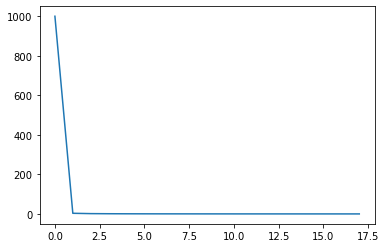

In [4]:
plt.plot(1/f)
plt.show()

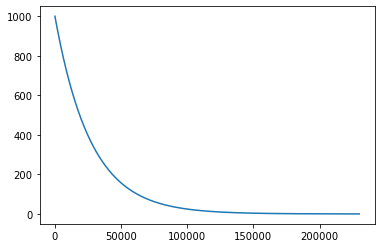

In [5]:
population = 1/ np.logspace(np.log10(0.001),np.log10(5),int(population_size))
plt.plot(population)
plt.show()

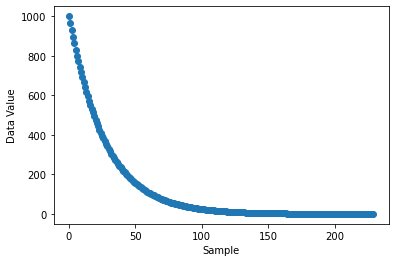

In [6]:
# To plot only one out of a 1000 points
skip = int(1e3)
plt.plot(population[::skip], "o")
plt.xlabel("Sample")
plt.ylabel("Data Value")
plt.show()

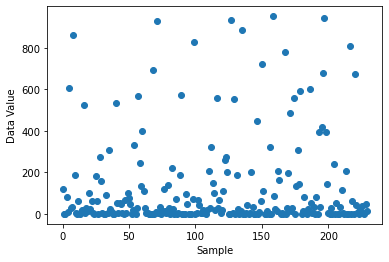

In [7]:
# Shuffle the data to remove the order
# Shuffle will change population (mutate it)
np.random.shuffle(population)
plt.plot(population[::skip], "o")
plt.xlabel("Sample")
plt.ylabel("Data Value")
plt.show()

## Monte Carlo Sampling

From 230k data points, we want to sample only 50 of them and compute their average, which will be one data point. We will do it 500 times randomly. This is Monte Carlo Sampling.

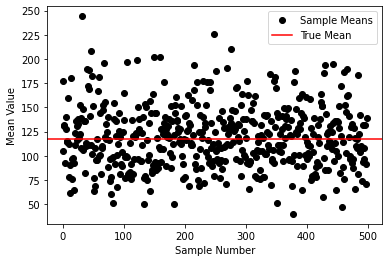

In [8]:
import random
population = sorted(population) # This step increases the efficiency substantially
sample_means = np.zeros(500)
for i in range(500):
    sample_means[i] = np.mean(random.sample(population,50))
plt.plot(sample_means, "ko", label = "Sample Means")
plt.axhline(y=np.mean(population), color='r', linestyle='-', label = "True Mean")
plt.xlabel("Sample Number")
plt.ylabel("Mean Value")
plt.legend()
plt.show()

In [9]:
# Let's softcode it here
population_size = 2.3e5
sample_size = 50
number_of_samples = 500

In [10]:
np.random.choice(np.array([1,2,3,4,5,6,7,9]), size = 3)

array([6, 6, 2])

In [11]:
# One Monte Carlo Sample
np.mean(np.random.choice(population, size = sample_size))

133.7545217367664

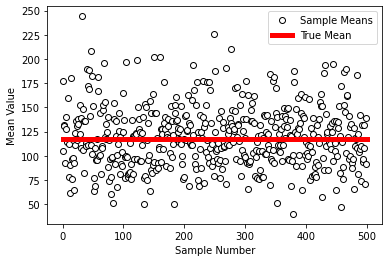

In [12]:
# This is way more efficient than the code i wrote myself because it doesnt need sorting
true_mean = np.mean(population)
samplemeans = np.zeros(number_of_samples)
for expi in range(number_of_samples):
    randsample = np.random.choice(population, size = sample_size)
    samplemeans[expi] = np.mean(randsample)
plt.plot(sample_means, "ko", markerfacecolor = "w", label = "Sample Means")
plt.plot([0,number_of_samples], [true_mean, true_mean], "r", linewidth = 5, label = "True Mean")
plt.xlabel("Sample Number")
plt.ylabel("Mean Value")
plt.legend()
plt.show()

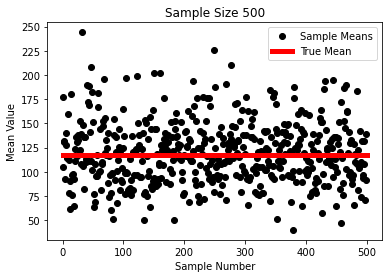

In [13]:
# Lets increase sample size to 500, and see that there is less variation
sample_size = 500
number_of_samples = 500
true_mean = np.mean(population)
samplemeans = np.zeros(number_of_samples)
for expi in range(number_of_samples):
    randsample = np.random.choice(population, size = sample_size)
    samplemeans[expi] = np.mean(randsample)
plt.plot(sample_means, "ko", label = "Sample Means")
plt.plot([0,number_of_samples], [true_mean, true_mean], "r", linewidth = 5, label = "True Mean")
plt.xlabel("Sample Number")
plt.ylabel("Mean Value")
plt.title("Sample Size 500")
plt.legend()
plt.show()

## Cummulative Averaging

As we move through the samples, we average their means. For example, at sample 300 we get the average of all samples from 1 to 300.

In [14]:
# Compute the cummulative average using for loop
cumave = np.zeros(number_of_samples)
for i in range(number_of_samples):
    cumave[i] = np.mean(samplemeans[:i+1])

In [15]:
# Another way to do it
cumave2 = np.cumsum(samplemeans)/np.arange(1, number_of_samples + 1)

In [16]:
# See if they are equal or not
np.mean(cumave - cumave2)

4.294520294934045e-14

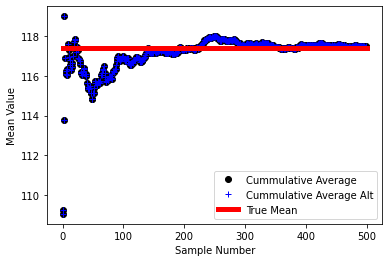

In [17]:
plt.plot(cumave, "ko", label = "Cummulative Average")
plt.plot(cumave2, "b+", label = "Cummulative Average Alt")
plt.plot([0, number_of_samples], [true_mean, true_mean], "r",\
         linewidth = 5, label = "True Mean")
plt.legend()
plt.xlabel("Sample Number")
plt.ylabel("Mean Value")
plt.show()

In [18]:
# Compute the divergence between cumulative mean and true mean
# meta_samples = samples of samples
number_of_meta_samples = 100
sample_size = 50
cumaves = np.zeros((number_of_meta_samples, number_of_samples))

for metai in range(number_of_meta_samples):
    for expi in range(number_of_samples):
        randsample = np.random.choice(population, size = sample_size)
        samplemeans[expi] = np.mean(randsample)
    # now we get the cummulative average divergence
    temp = np.cumsum(samplemeans)/np.arange(1, number_of_samples + 1)
    cumaves[metai,:] = (temp - true_mean)**2

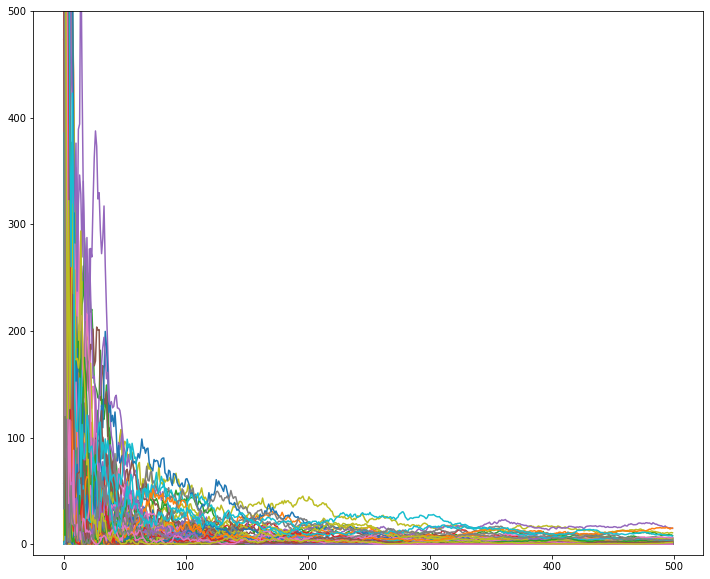

In [19]:
plt.figure(figsize = (12, 10))
plt.plot(cumaves.T)
plt.ylim([-10, 500])
plt.show()

## Bonus: The Central Limit Theorem 

**The Central Limit Theorem (CLT)**: The distribution of sample means is going to be raughly Gaussian distributed around the true mean.

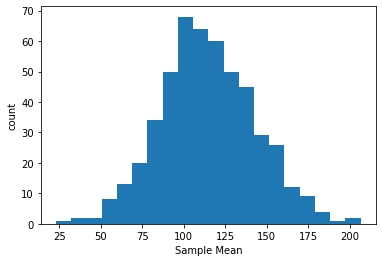

In [20]:
plt.hist(samplemeans, bins = "fd") #fd algorithm: it adjusts automatically
plt.xlabel("Sample Mean")
plt.ylabel("count")
plt.show()

In [21]:
number_of_meta_samples = 100
sample_size = 50
# cumaves = np.zeros((number_of_meta_samples, number_of_samples))
allsamplemeans = np.zeros((number_of_meta_samples, number_of_samples))
for metai in range(number_of_meta_samples):
    for expi in range(number_of_samples):
        randsample = np.random.choice(population, size = sample_size)
        samplemeans[expi] = np.mean(randsample)
    # now we get the cummulative average divergence
#    temp = np.cumsum(samplemeans)/np.arange(1, number_of_samples + 1)
#    cumaves[metai,:] = (temp - true_mean)**2
    # Store the sample means
    allsamplemeans[metai, :] = samplemeans

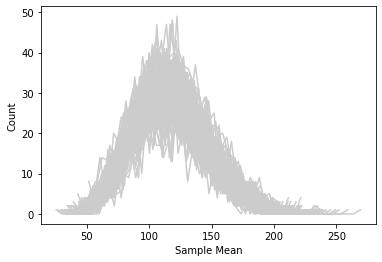

In [22]:
nbins = 40
for i in range(number_of_meta_samples):
    y,x = np.histogram(allsamplemeans[i,:], bins = nbins)
    x = (x[1:] + x[:-1])/2 # get the center of each x
    plt.plot(x,y, color = [0.8, 0.8, 0.8])
plt.xlabel("Sample Mean")
plt.ylabel("Count")
plt.show()